# Masterclass embeddings
## Hands-on: embeddings on mixed datasets 
#### Rijkswaterstaat | Datalab 

PCA and other embeddings are extremely usefull for visualizing a high-dimensional dataset in 2D for understanding its intrinsic structure. In this notebook we will use existing data sets, and experiment with various dimensionality reduction techniques and embeddings, such as Principal Component Analysis (PCA), t-SNE. In addition we will analyze the "goodness" of high-dimensionality reduction.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install tqdm
!pip install pca
!pip install df2onehot
!pip install colourmap
!pip install hnet
!pip install flameplot
!pip install d3blocks


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=767a832b2ed4302263a99071e99d8c0bb678cfc98a6acb8f63346f49f0cef8d9
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c7c9e5fb9aac294727a17c0bc6bc6bd03adf7a8a9c6c7ba50089c211c799f7ad
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 KB 2.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

<h2>Principal Component Analysis</h2>
<h3>The algorithm</h3>

Principal component analysis (PCA) involves a mathematical procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

<br><b>Objectives of principal component analysis</b>
<br>•	1. To reduce the dimensionality
<br>•	2. To discover/explore the data set.
<br>•	3. To identify new meaningful underlying variables.



### EXERCISE
Lets try again but now on titanic data set!
Your goal is to determine transform the mixed dataset and make it visible in 2D where you can demonstrate the relationships passangers.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pca import pca
from df2onehot import df2onehot
from sklearn.manifold import TSNE
import hnet
import flameplot as flameplot

# print(os.getcwd())

ModuleNotFoundError: ignored

In [92]:
# Import example
import pca
df = pca.import_example()

[pca] >Import dataset [titanic]


In [93]:
# Transform data into one-hot
y = df['Survived'].values
del df['Survived']
del df['PassengerId']
del df['Name']
out = df2onehot(df)
X = out['onehot'].copy()
X.index = y


[df2onehot] >Auto detecting dtypes.


100%|██████████| 9/9 [00:00<00:00, 195.51it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 9/9 [00:00<00:00, 19.38it/s]

[df2onehot] >Total onehot features: 852


In [94]:
#np.random.normal(0, 0.01, size=[2,2])

In [95]:
X = X + np.random.normal(0, 0.01, size=X.shape)


In [96]:
X.head()

,Pclass_1.0,Pclass_2.0,Pclass_3.0,Sex_female,Sex_male,SibSp_0.0,SibSp_1.0,SibSp_2.0,SibSp_3.0,SibSp_4.0,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_None,Cabin_T,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0.009571,0.002841,1.003295,0.012666,0.995058,0.006003,1.007216,-0.016353,0.001538,-0.003480,...,0.015093,-0.001798,0.006775,-0.012420,0.993642,-0.004036,0.010202,-0.002442,-0.007171,1.022362
1,1.013429,0.006060,0.014129,0.986188,0.015796,0.013884,1.006121,-0.000720,0.008957,0.019430,...,0.009878,-0.017512,0.015050,-0.002977,-0.000225,-0.008134,1.011252,-0.000366,-0.004542,-0.003349
1,-0.013518,0.013209,1.020678,1.000510,0.008856,0.997447,-0.000796,-0.012338,0.004435,-0.007485,...,0.005484,-0.011431,0.006444,-0.011405,1.020355,-0.014737,0.012831,0.000598,0.007325,0.996646
1,0.997322,0.012724,-0.020975,0.989174,-0.010413,-0.010180,0.991101,0.003444,-0.019309,0.019342,...,0.007459,-0.014315,-0.005376,0.006002,-0.014894,-0.005542,0.003525,-0.011590,0.005285,1.002511
0,-0.004228,0.020956,0.994823,0.016012,1.020442,1.002599,0.001446,0.004606,0.008363,0.009033,...,-0.022832,-0.004147,0.003498,0.003059,1.007841,0.011491,-0.012605,0.021714,-0.010370,1.001567


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [852] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [489] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [852] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[489]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


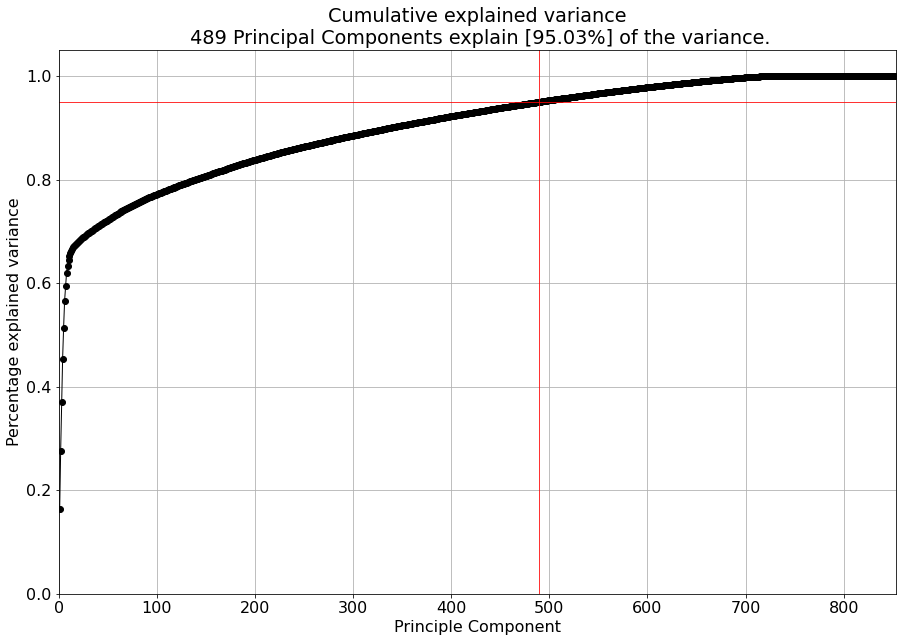

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fbc555b4f70>)

<Figure size 432x288 with 0 Axes>

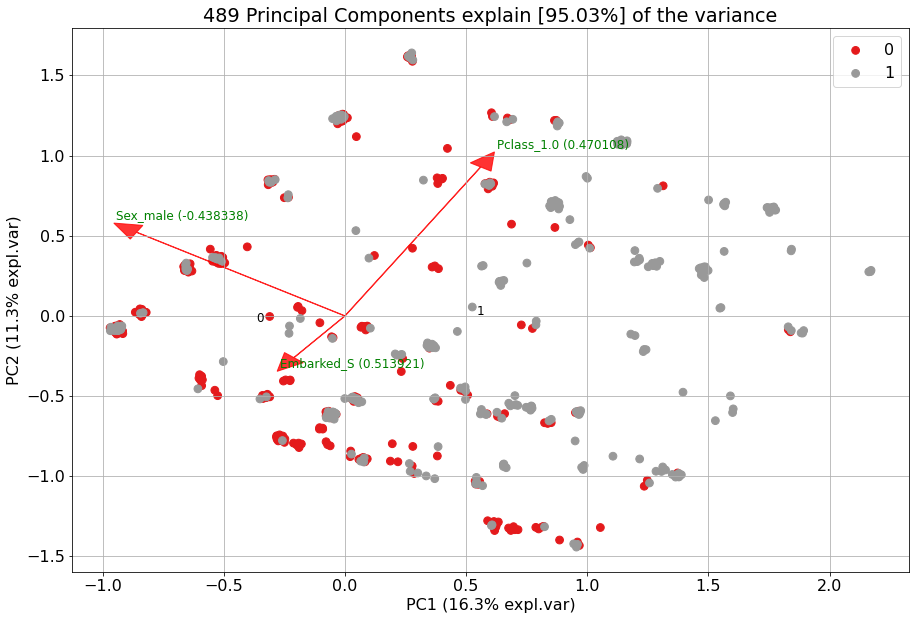

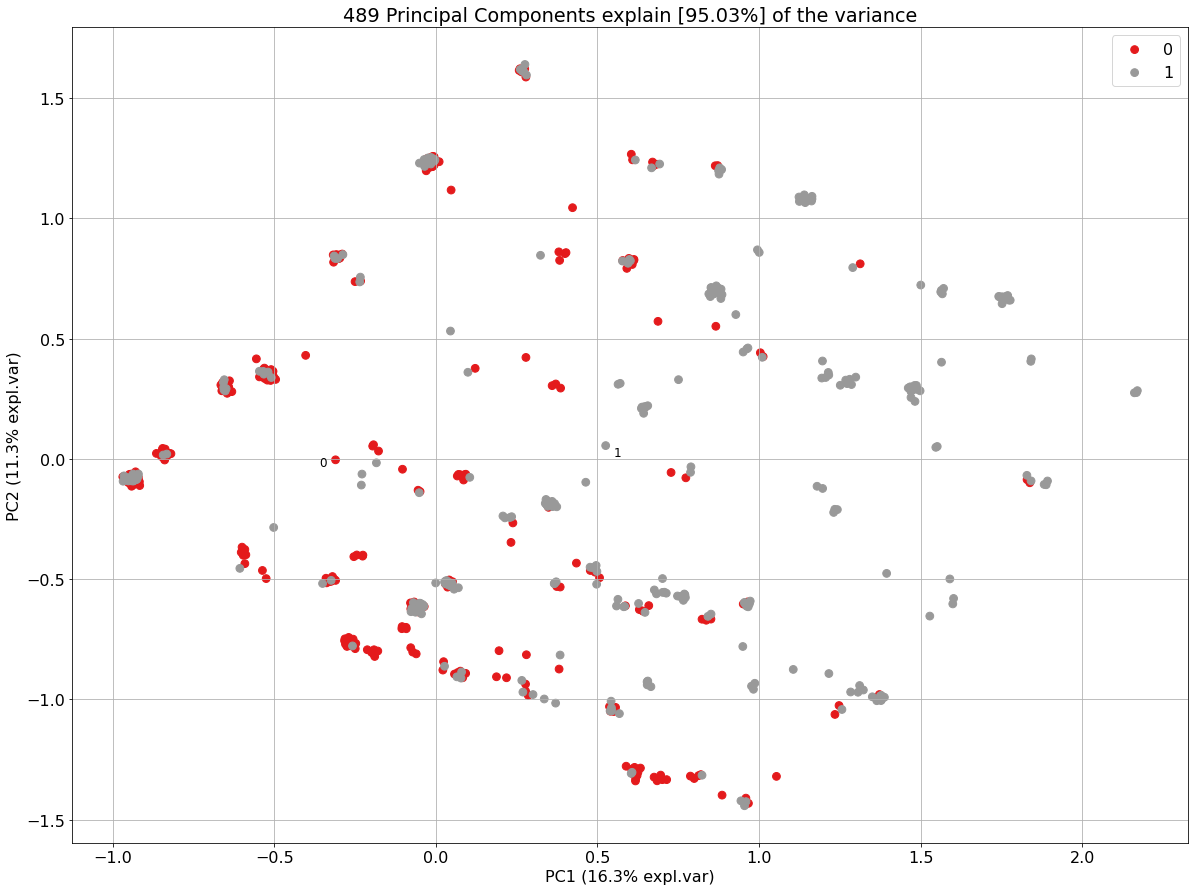

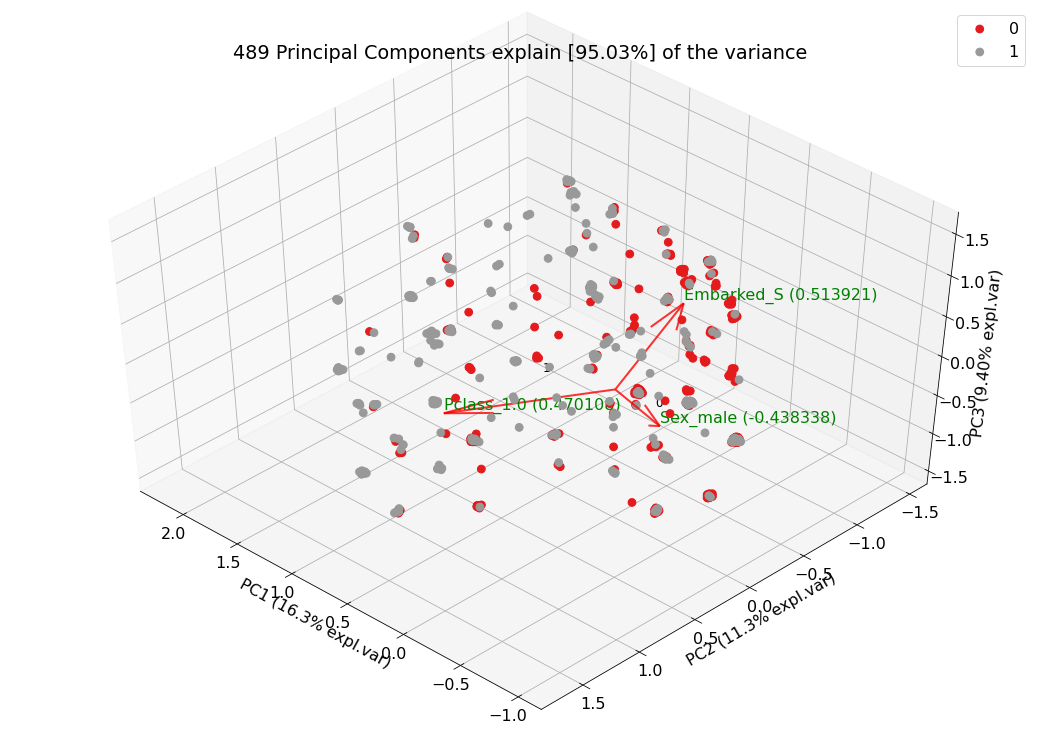

In [97]:
from pca import pca

# Initialize
model1 = pca(normalize=False, onehot=False)
# Run model 1
_=model1.fit_transform(X)
model1.plot()
model1.biplot(n_feat=3)
model1.scatter()
model1.biplot3d(n_feat=3)

#### Kan je nu beschrijven welke features de meeste variatie geven in de ruimte?

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [852] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [633] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [852] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[633]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


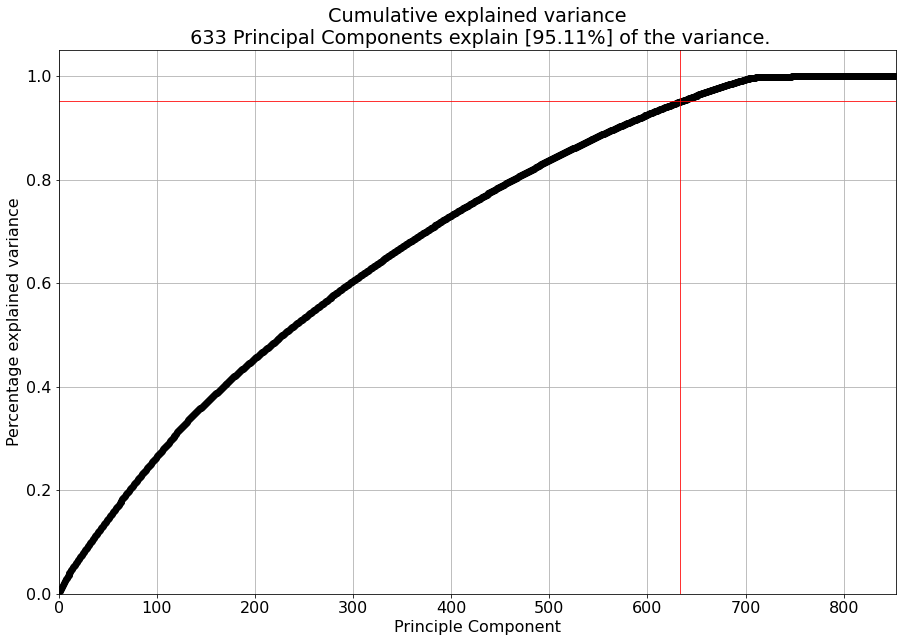

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fbc5507ef70>)

<Figure size 432x288 with 0 Axes>

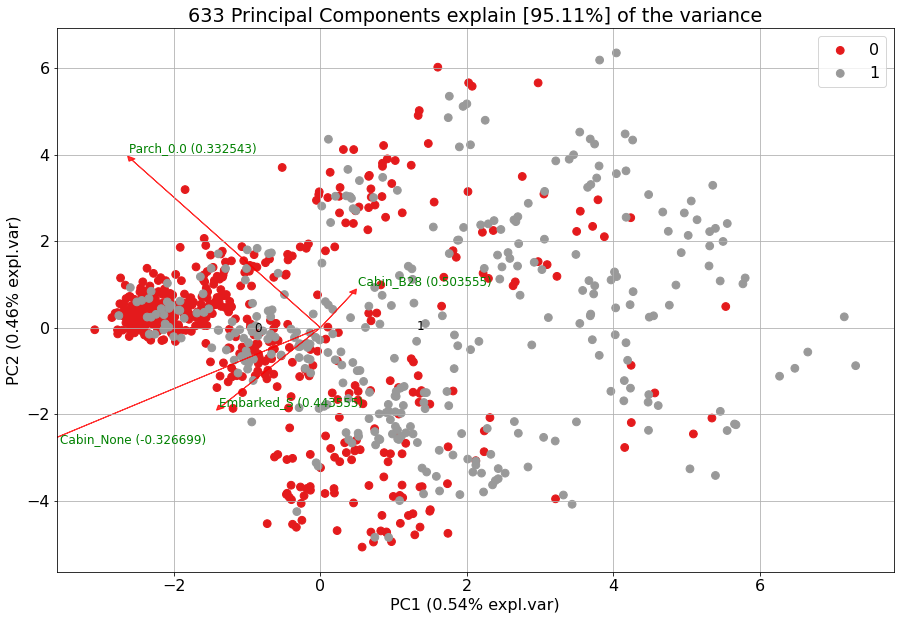

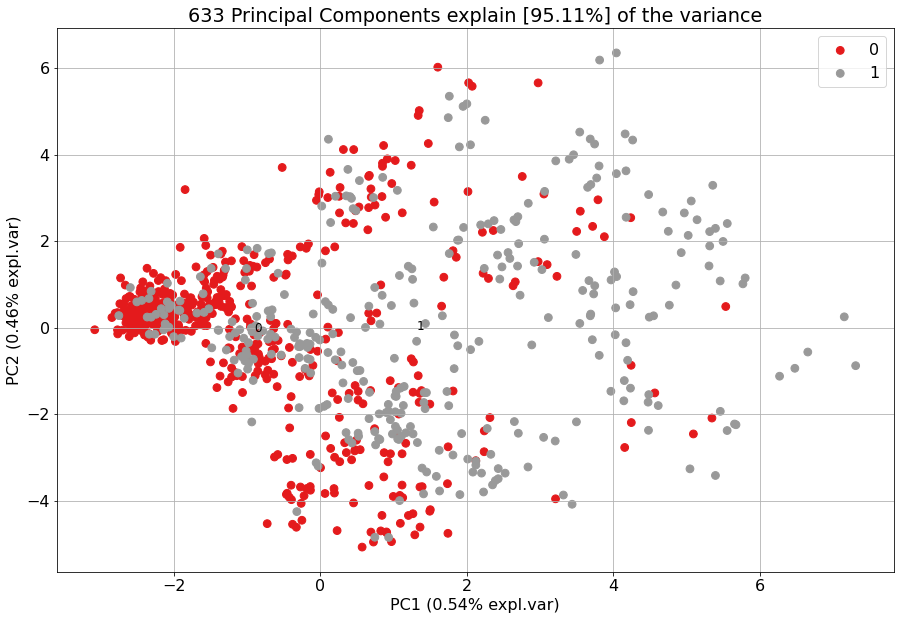

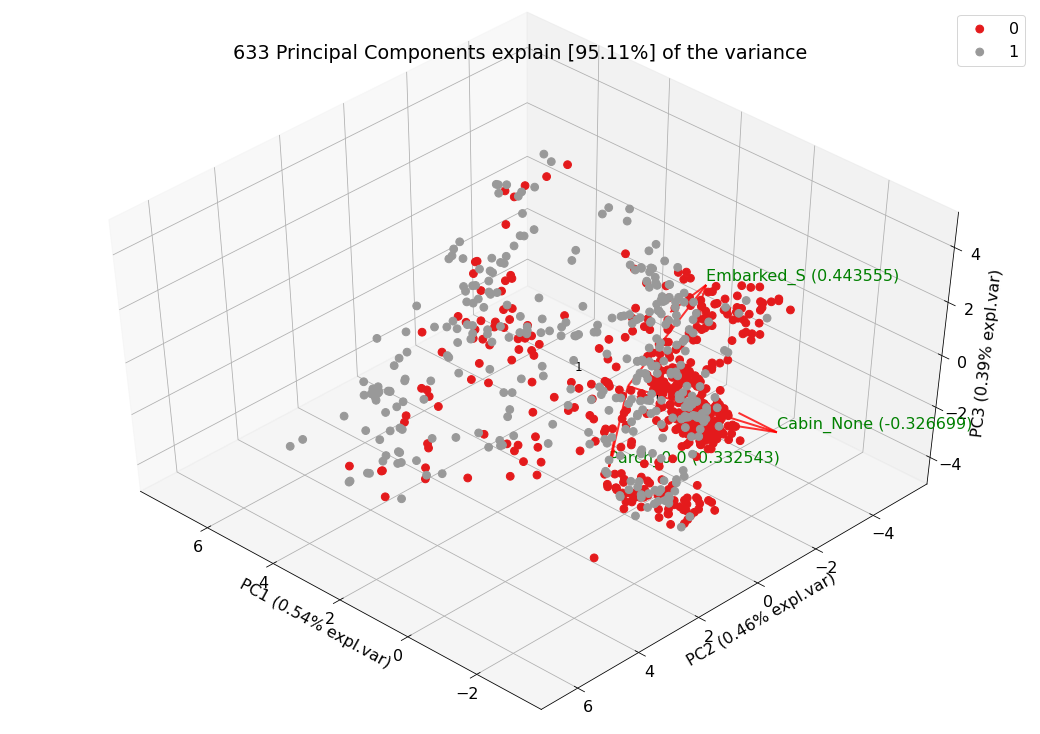

In [115]:
# Initialize
model2 = pca(normalize=True, onehot=False)
# Run model 2
_=model2.fit_transform(X)
model2.plot(figsize=(15, 10))
model2.biplot(n_feat=4, figsize=(15, 10))
model2.scatter(figsize=(15, 10))
model2.biplot3d(n_feat=3, figsize=(15, 10))

In [99]:
# Initialize
# model3 = pca(normalize=False, onehot=True)
# Run model 2
# _=model3.fit_transform(X)
# model3.biplot(n_feat=3)

## tSNE

In [100]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html


In [105]:
#model = TSNE(n_components=2, metric='hamming', verbose=3)
model = TSNE(n_components=2, verbose=3)
X_embedded = model.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 891 samples in 0.001s...
[t-SNE] Computed neighbors for 891 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 891 / 891
[t-SNE] Mean sigma: 0.244889
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 68.4676361, gradient norm = 0.3033663 (50 iterations in 1.262s)
[t-SNE] Iteration 100: error = 66.5399399, gradient norm = 0.2736032 (50 iterations in 0.896s)
[t-SNE] Iteration 150: error = 68.3263092, gradient norm = 0.2697423 (50 iterations in 0.256s)
[t-SNE] Iteration 200: error = 68.1482925, gradient norm = 0.2673222 (50 iterations in 0.264s)
[t-SNE] Iteration 250: error = 69.7749634, gradient norm = 0.2507057 (50 iterations in 0.308s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.774963
[t-SNE] Iteration 300: error = 1.0395203, gradient norm = 0.0020122 (50 iterations in 0.391s)
[t-SNE] Iteration 350: error = 0.9610629, gradient norm = 0.0005025 (

In [106]:
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,female,19.0,0,0,112053,30.0000,B42,S
888,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,26.0,0,0,111369,30.0000,C148,C


In [107]:
#

In [108]:
from d3blocks import D3Blocks
d3 = D3Blocks()
#d3.scatter(X_embedded[:,0], X_embedded[:,1], notebook=True)

# Set all propreties
d3.scatter(X_embedded[:,0],                       # PC1 x-coordinates
           X_embedded[:,1],                       # PC2 y-coordinates
           x1=model2.results['PC']['PC1'].values, # tSNE x-coordinates
           y1=model2.results['PC']['PC2'].values, # tSNE y-coordinates
           color=X.index.values.astype(str),      # Hex-colors or classlabels
           tooltip=df.index.values.astype(str),   # Tooltip
           size=df['Age']/10,                     # Node size
           opacity=df['Fare'],                    # Opacity
           stroke='#000000',
           cmap='tab20',                          # Colormap
           scale=True,                            # Scale the datapoints
           label_radio=['tSNE', 'PCA'],
           figsize=[1024, 768], 
           notebook=True,
           )


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Scatter]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/scatter.html]
[d3blocks] >INFO> Scaling xy-coordinates.
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/scatter.html]
[d3blocks] >INFO> Display in notebook using IPython.


(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbc553047c0>)

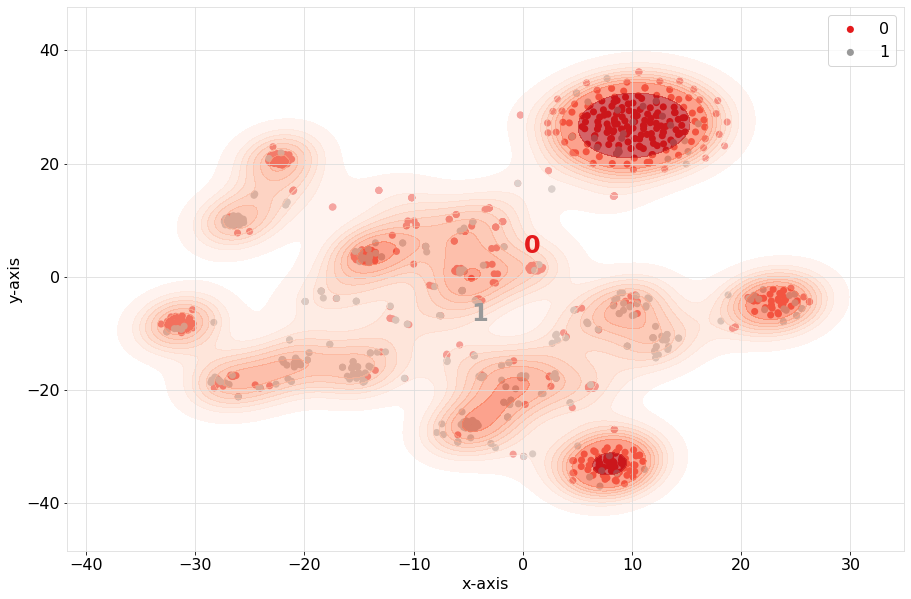

In [109]:
from scatterd import scatterd
scatterd(X_embedded[:,0], X_embedded[:,1], labels=X.index.values.astype(str), figsize=(15,10), density=True, cmap='Set1')

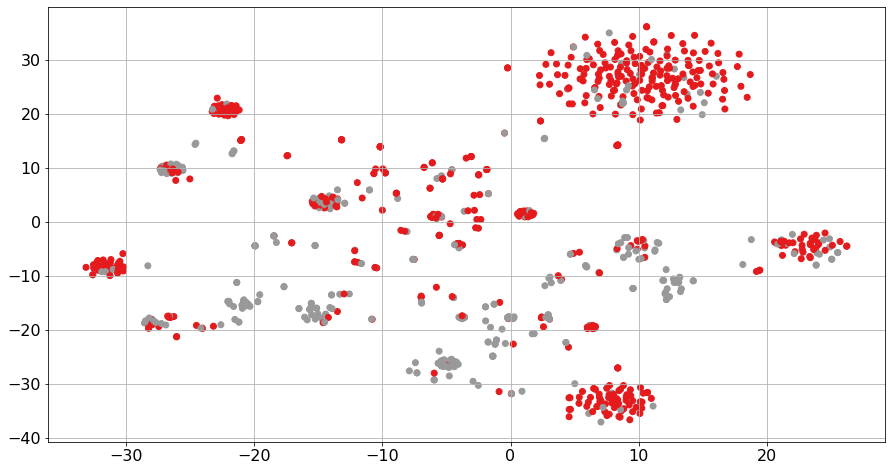

In [110]:
import colourmap
cols=colourmap.fromlist(X.index.values)[0]
plt.figure(figsize=(15,8))
plt.grid(True)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=cols)

<hr>
<h2>High vs Low dimensionality</h2>
<br><b>When performing a dimensionality reduction, we want to preserve as good as possible the high-dimensional structure</b>

<h3>The algorithm</h3>
Quantification of Local similarity across two maps
To compare the embedding of samples in two different maps, we propose a scale dependent similarity measure. For a pair of maps X and Y, we compare the sets of the, respectively, kx and ky nearest neighbours of each sample. We first define the variable rxij as the rank of the distance of sample j among all samples with respect to sample i, in map X. The nearest neighbor of sample i will have rank 1, the second nearest neighbor rank 2, etc. Analogously, ryij is the rank of sample j with respect to sample i in map Y. Now we define a score on the interval [0, 1], as (eq. 1)

Where the variable n is the total number of samples, and the indicator function is given by (eq. 2)

The score sx,y(kx, ky) will have value 1 if, for each sample, all kx nearest neighbours in map X are also the ky nearest neighbours in map Y, or vice versa. For the analysis in Fig. 3 we have used kx = ky = 20. Other settings of kx and ky can be found in the supplement (Fig. S18). Note that a local neighborhood of 20 samples (that we used in our experimental settings) is based on the cancer-tissue with the smallest number of samples (i.e., PAAD). For the analysis in Supplementary Fig. S3, panel b–e we used kxy = 250 which is the average of the cancer-tissue group size.


In [111]:
# !pip install flameplot
print(model2.results['PC'].shape)
print(model2.results['pcp'])
print(model2.n_components)

(891, 633)
0.9511525623014631
633


In [112]:
X_pca_50=model2.results['PC'].iloc[:,0:50].values
X_pca = model2.results['PC'].values

In [113]:
# Compare PCA(50) vs. tSNE
scores1 = flameplot.compare(X_pca_50, X_embedded, n_steps=10)

NameError: ignored

In [114]:
# plot
fig=flameplot.plot(scores1, xlabel='PCA (50d)', ylabel='tSNE (2d)')

NameError: ignored

#### De Principal Components 

De rijen zijn de samples en de features zijn nog gecomprimeerd in de PCs. 
De PCs is nu de nieuwe feature ruimte.
Je kan nu dus heel makkelijk de samples plotten over de PC1 en PC2 of andere combinaties van PCs. 


<hr>
<h2>DBSCAN</h2>
<h3>Algorithm to find clusters</h3>



In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=5).fit(X_embedded)
np.unique(clustering.labels_)

array([0, 1, 2, 3, 4])

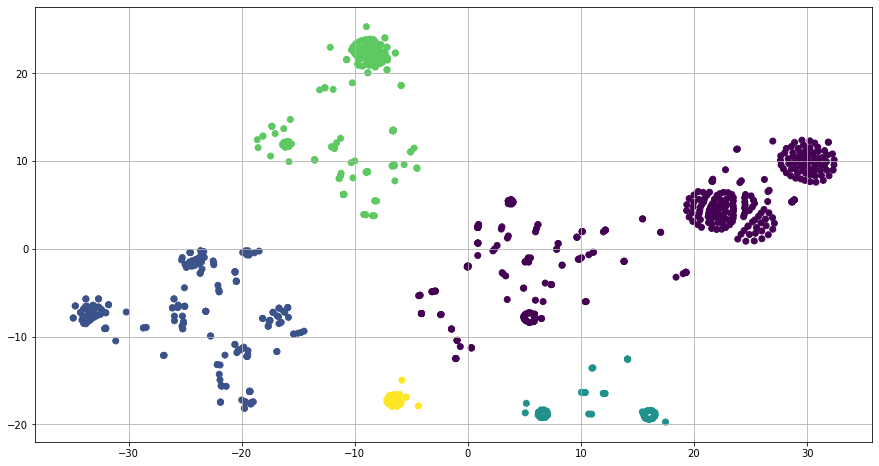

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clustering.labels_)

<hr>
<h2>HNet</h2>
<h3>Algorithm to determine, among others, cluster enrichment.</h3>



In [ ]:
results = hnet.enrichment(df, y=clustering.labels_)
results = results.sort_values(by='Padj')
results.reset_index(drop=True, inplace=True)

[hnet] >Start making fit..
[DTYPES] Auto detecting dtypes
[DTYPES] [Pclass]   > [int]  ->[cat] [3]
[DTYPES] [Sex]      > [obj]  ->[cat] [2]
[DTYPES] [Age]      > [float]->[num] [88]
[DTYPES] [SibSp]    > [int]  ->[cat] [7]
[DTYPES] [Parch]    > [int]  ->[cat] [7]
[DTYPES] [Ticket]   > [obj]  ->[cat] [681]
[DTYPES] [Fare]     > [float]->[num] [248]
[DTYPES] [Cabin]    > [obj]  ->[cat] [147]
[DTYPES] [Embarked] > [obj]  ->[cat] [3]
[DTYPES] Setting dtypes in dataframe
[hnet] >Analyzing [cat] Pclass.....
[hnet] >Analyzing [cat] Sex.....
[hnet] >Analyzing [num] Age.....
[hnet] >Analyzing [cat] SibSp.....
[hnet] >Analyzing [cat] Parch.....
[hnet] >Analyzing [cat] Ticket.....
[hnet] >Analyzing [num] Fare.....
[hnet] >Analyzing [cat] Cabin....
[hnet] >Analyzing [cat] Embarked.....
[hnet] >Multiple test correction using holm
[hnet] >Fin


In [ ]:
results.head()

,category_label,P,logP,overlap_X,popsize_M,nr_succes_pop_n,samplesize_N,dtype,y,category_name,Padj,zscore,nr_not_succes_pop_n
0,1.0,1.538980e-213,-490.019505,215.0,891,216,216.0,categorical,1,Pclass,6.329825e-210,NaN,NaN
1,2.0,2.549457e-196,-450.370798,183.0,891,184,184.0,categorical,3,Pclass,1.048337e-192,NaN,NaN
2,3.0,2.400642e-157,-360.630124,389.0,891,491,390.0,categorical,0,Pclass,9.869037e-154,NaN,NaN
3,Q,1.018233e-88,-202.609419,65.0,889,77,66.0,categorical,2,Embarked,4.184939e-85,NaN,NaN
4,low_60.3,1.708539e-82,-188.276339,NaN,891,216,NaN,numerical,1,Fare,7.020387e-79,19.240107,675.0


Text(0.5, 1.0, 'Enrichment for cluster 2 is Embarked Q\nP=4.1849389800720254e-85')

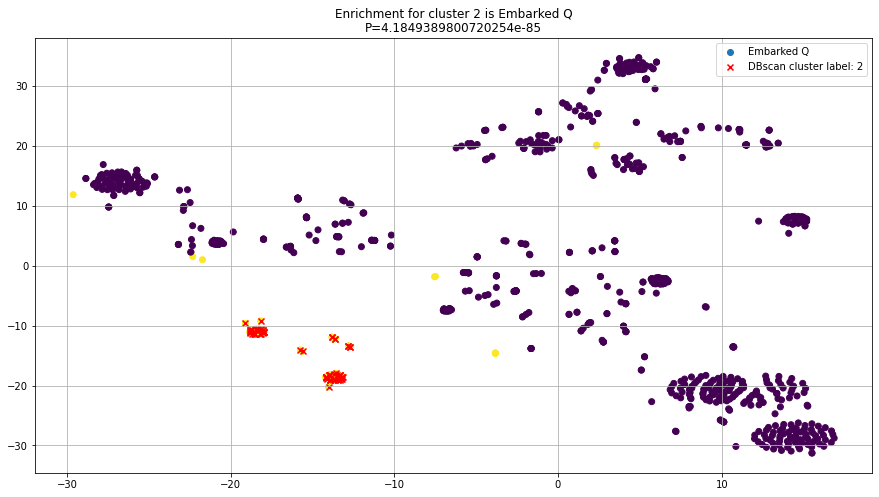

In [ ]:
# Plot the catagories that are highest enriched to some of the cluster.
# Note that multiple catagories can be enriched for certain clusters.
# Play arround with k
k=3

# Get the results
catname = results['category_name'].iloc[k]
catlabel = results['category_label'].iloc[k]
y = int(results['y'].iloc[k])
y = clustering.labels_==y

clust_0=df[catname].astype(str).values==catlabel.replace('.0','')

plt.figure(figsize=(15,8))
plt.grid(True)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clust_0, label=(catname+' '+catlabel))
plt.scatter(X_embedded[y,0], X_embedded[y,1], c='r', marker='x', label='DBscan cluster label: '+results['y'].iloc[k])
plt.legend()
plt.title('Enrichment for cluster '+results['y'].iloc[k] + ' is ' + catname+' '+catlabel + '\nP=' + str(results['Padj'].iloc[k]))

In [ ]:
# Fin